<a href="https://colab.research.google.com/github/Nishil2009/Data-anlaytics-course/blob/main/Anomalydetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What is Dimensionality Reduction? Why is it important in machine learning?

- Dimensionality reduction is the process of reducing the number of input variables (features) in a dataset while preserving as much of the important information as possible. It maps high-dimensional data into a lower-dimensional space through feature selection (choosing a subset of original features) or feature extraction (creating new combined features).
It's important because:

Reduces overfitting — fewer features lower model complexity and reduce the chance of overfitting on noise.

Improves performance — lower dimensional data speeds up training and inference.

Removes redundancy — correlated or irrelevant features get removed or combined.

Enhances visualization — projects high-dimensional data into 2D/3D for human interpretation.

Improves storage and transmission — less memory and bandwidth needed for smaller representations.

2. Name and briefly describe three common dimensionality reduction techniques.

- Principal Component Analysis (PCA): A linear technique that finds orthogonal directions (principal components) of maximum variance in the data. Data projected onto the top components captures most variance with fewer dimensions. Good for linear structure and noise reduction.

- t-Distributed Stochastic Neighbor Embedding (t-SNE): A nonlinear method that preserves local structure: similar points in high-dimensional space remain close in the low-dimensional embedding. Commonly used for visualization (2D/3D) of complex datasets, but not ideal for preserving global distances or for downstream modeling.

- Autoencoders: Neural-network-based feature extractors that learn to compress input into a lower-dimensional latent representation (encoder) and reconstruct it back (decoder). Useful for nonlinear reduction, can be regularized for robustness, and combined with deep learning workflows.

3. What is clustering in unsupervised learning? Mention three popular clustering algorithms.

- Clustering is an unsupervised learning task that groups data points into clusters such that points within the same cluster are more similar to each other than to those in other clusters. It discovers natural groupings without labeled data.
Three popular algorithms:

K-means: Partitions data into k clusters by minimizing within-cluster variance; efficient for spherical clusters of similar size but requires k and is sensitive to initialization and outliers.

Hierarchical Clustering (Agglomerative/Divisive): Builds a tree (dendrogram) of nested clusters either by merging (agglomerative) or splitting (divisive). No need to pre-specify k; useful to explore cluster structure.

DBSCAN: Density-based clustering that groups high-density regions and labels low-density points as noise. Can find arbitrarily shaped clusters and handle outliers, but requires careful parameter tuning (eps, min_samples).

4. Explain the concept of anomaly detection and its significance.

-Anomaly detection is the process of identifying observations that deviate significantly from the majority of the data (outliers). These anomalies may indicate errors, rare events, or important but infrequent phenomena.

Significance:

Fraud detection: Spot unusual transactions.

Fault detection: Identify failing equipment in manufacturing or IoT.

Security: Detect intrusions or unusual access patterns.

Quality control: Find defective products or data corruptions.
Detecting anomalies helps organizations act quickly on rare but critical events and improves system reliability and safety.

5. List and briefly describe three types of anomaly detection techniques.

Statistical Methods: Assume a distribution for normal data (e.g., Gaussian). Points with low probability under this model are flagged as anomalies. Simple and interpretable but sensitive to the correctness of distributional assumptions.

Distance-/Density-based Methods: Examples: k-NN distance, Local Outlier Factor (LOF), and DBSCAN-based approaches. Points far from neighbors or in low-density regions are anomalies. Good for nonparametric scenarios and varied shapes.

Model-based / Machine Learning Methods: Use models such as One-Class SVM, isolation forest, or autoencoders. Isolation Forest isolates anomalies via random splits; autoencoders flag points with high reconstruction error. These handle complex, high-dimensional patterns.

6. What is time series analysis? Mention two key components of time series data.

Time series analysis studies data points collected sequentially over time to understand structure, patterns, and to forecast future values. It focuses on temporal dependencies and trends.
Two key components:

Trend: Long-term upward or downward movement in the data, e.g- steadily rising sales.

Seasonality: Regular, repeating patterns at fixed periods e.g- daily, weekly, yearly cycles.
(Other components often considered include cyclic behavior, irregular/noise, and level.)

7. Describe the difference between seasonality and cyclic behavior in time series.

- Seasonality refers to regular, fixed-period fluctuations that repeat at known intervals for e.g- weekly, monthly, yearly. The period is constant and usually driven by calendar or natural cycles. For example, electricity demand peaking every summer or retail spikes in December.

- Cyclic behavior refers to oscillations that occur irregularly with varying period and amplitude; cycles are often driven by economic or business cycles and not tied to a fixed calendar period. Cycles can last for varying lengths of time and are less predictable than seasonality.


K-means results
--------------
Number of clusters (k): 4
Inertia: 203.891
Cluster centers:
  Cluster 0: [-2.60516878  8.99280115]
  Cluster 1: [-6.85126211 -6.85031833]
  Cluster 2: [4.68687447 2.01434593]
  Cluster 3: [-8.83456141  7.24430734]

First 10 rows with assigned clusters:
          x1        x2  cluster
0  -9.113944  6.813616        3
1  -9.354576  7.092790        3
2  -2.015671  8.281780        0
3  -7.010236 -6.220843        1
4 -10.061202  6.718671        3
5  -6.365031 -6.976073        1
6   4.743787  2.204360        2
7  -6.631868 -7.218344        1
8  -2.796702  8.902891        0
9   3.925097  2.367102        2


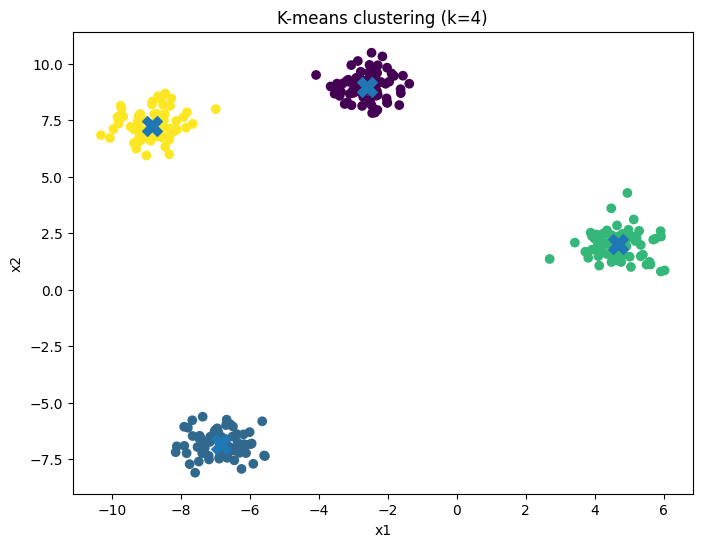

In [1]:
#8. Write Python code to perform K-means clustering on a sample dataset.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Create synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Run KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
inertia = kmeans.inertia_

print("K-means results")
print("--------------")
print(f"Number of clusters (k): {k}")
print(f"Inertia: {inertia:.3f}")
print("Cluster centers:")
for i, c in enumerate(centers):
    print(f"  Cluster {i}: {c}")

# DataFrame to inspect results
df = pd.DataFrame(X, columns=["x1", "x2"])
df["cluster"] = labels
print("\nFirst 10 rows with assigned clusters:")
print(df.head(10))

# Simple scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels)   # let matplotlib choose colors
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200)
plt.title("K-means clustering (k=4)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

In [3]:
#9. What is inheritance in OOP? Provide a simple example in Python.
#Inheritance is an object-oriented programming concept where a new class (subclass/child) derives attributes and methods from an existing class (base/parent). It promotes code reuse and helps model "is-a" relationships.
class Animal:
    def __init__(self, name):
        self.name = name

    def speak(self):
        return "Some sound"

class Dog(Animal):   # Dog inherits from Animal
    def speak(self):
        return "Bark"

class Cat(Animal):   # Cat inherits from Animal
    def speak(self):
        return "Meow"

# Usage
d = Dog("Rex")
c = Cat("Mittens")
print(d.name, "says", d.speak())  # Rex says Bark
print(c.name, "says", c.speak())  # Mittens says Meow


Rex says Bark
Mittens says Meow


10. How can time series analysis be used for anomaly detection?

Time series analysis aids anomaly detection by modeling expected temporal behavior and then flagging deviations. Common approaches:

- Forecasting and residuals: Train a forecasting model (ARIMA, exponential smoothing, Prophet, LSTM) to predict future values. Large prediction errors (residuals) beyond a threshold indicate anomalies.

- Seasonal decomposition: Decompose series into trend, seasonality, and residual. Unusually large residuals or spikes indicate anomalies after removing predictable components.

- Moving window statistics: Use rolling mean and standard deviation; points outside a multiple of the rolling std (e.g., >3σ) are anomalies.

- State-space / probabilistic models: Models provide likelihood scores; low-probability observations are anomalies.

- Change-point detection: Detect abrupt changes in mean/variance which indicate structural anomalies.
Time-aware methods are crucial because temporal dependencies and seasonality must be accounted for—otherwise normal seasonal peaks may be misclassified as anomalies.